In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('titanic_train.csv')

In [6]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Linear regression

In [30]:
x = np.array([0,1,2,3,4,5,6,7,8,9]).reshape(-1,1)#-1,row jati hos,1 column eutai huna paryo
y = np.array([9,8,7,6,4,5,1,2,3,4]).reshape(-1,1)

In [31]:
x


array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [32]:
y

array([[9],
       [8],
       [7],
       [6],
       [4],
       [5],
       [1],
       [2],
       [3],
       [4]])

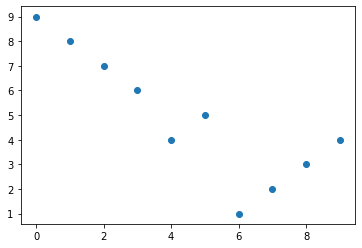

In [33]:
plt.scatter(x,y)

In [34]:
model = LinearRegression()


In [35]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# y = mx+c

In [36]:
# m or slope
m = model.coef_

In [37]:
# c or y-intercept
c = model.intercept_

In [38]:
c

array([8.14545455])

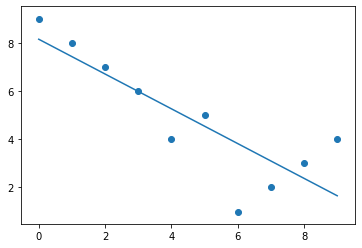

In [39]:
y_pred = m*x+c
plt.plot(x,y_pred)
plt.scatter(x,y)

# Logistic Regression

In [40]:
df  = pd.read_csv('titanic_train.csv')

In [41]:
df['Age'] = df ['Age'].fillna(df['Age'].mean())

In [43]:
df .head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [44]:
df.drop(['PassengerId','Sex','Embarked','Name','Ticket','Cabin'],axis = 1,inplace = True)

In [45]:
df.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.25


# Building Logistic Regression

In [46]:
from sklearn.model_selection import train_test_split


In [47]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(['Survived'],axis=1),df['Survived'],test_size=0.30)

In [52]:
X_train

,Pclass,Age,SibSp,Parch,Fare
509,3,26.000000,0,0,56.4958
502,3,29.699118,0,0,7.6292
796,1,49.000000,0,0,25.9292
133,2,29.000000,1,0,26.0000
628,3,26.000000,0,0,7.8958
...,...,...,...,...,...
177,1,50.000000,0,0,28.7125
277,2,29.699118,0,0,0.0000
611,3,29.699118,0,0,7.0500
142,3,24.000000,1,0,15.8500


In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/arun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
predictions = logmodel.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)


0.7164179104477612

In [62]:
#m or slope, 5 coeff because we have 5 different independent variables
m = logmodel.coef_
m

array([[-0.69202369, -0.02034435, -0.20653949,  0.20123966,  0.00494542]])

In [64]:
#y-intercept
c = model.intercept_
c

array([8.14545455])